# Pandas

**Pandas** - библиотека для анализа данных на `Python`. Позволяет работать с табличными данными, временными рядами и другими структурами данных, анализировать и визуализировать их. 

Основные преимущества:
- богатый инструментарий для анализа данных - аггрегация, трансформация и т.п.
- возможность чтения и записи данных из\в разные форматы - `CSV`, `Excel`, СУБД
- совместимость со многими библиотеками из экосистемы `Python` для научных вычислений
- возможность работать и иерархическими данными


### Series

In [1]:
import pandas as pd

Базовая структура данных - это `Series`. Интуитивно это типизированный вектор, каждый элемент которого имеет ассоциированную с ним некоторую уникальную метку. Набор меток, который привязан к `Series` называется индексом. `Series` можно создать из списка `Python` или из массива `NumPy`

In [2]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

по умолчанию в качестве индекса выступают упорядоченные целые числа, но можно использовать строки, даты, и многие другие объекты. 

In [3]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

Можно и прямо использовать словарь с аналогичным результатом

In [4]:
pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})

a    1
b    2
c    3
d    4
dtype: int64

К элементам `Series` можно обращаться  по индексу

In [5]:
s['c']

3

Так как индекс упорядоченный, мы можем обращаться к элементам в `Series` с помошью чисел, точно так же как мы это делали  в списках `Python` или массивав `NumPy`

In [6]:
s[2]

3

Можем даже использовать срезы, получаяновый объект `Series`

In [7]:
s[2:4]

c    3
d    4
dtype: int64

In [8]:
s['c':'d']

c    3
d    4
dtype: int64

Из объекта `Series` можно получить `NumPy`-массив значений

In [9]:
s.values

array([1, 2, 3, 4])

и значения индекса

In [10]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Рассмотрим более интересный пример - загрузим CSV-файл с информацией о курсе Евро с 01.04.2017 ао 15.04.2017

In [11]:
# первые 5 строчек нашего файла
!head -n 5 data/eur.csv

2017-04-01,59.8107
2017-04-04,59.8953
2017-04-05,60.2427
2017-04-06,59.6948
2017-04-07,60.0827


Загружаем файл в `Series`

In [12]:
s = pd.read_csv('data/eur.csv', index_col=0, header=None, parse_dates=True).loc[:, 1]
s

0
2017-04-01    59.8107
2017-04-04    59.8953
2017-04-05    60.2427
2017-04-06    59.6948
2017-04-07    60.0827
2017-04-08    60.5687
2017-04-11    60.7469
2017-04-12    60.3042
2017-04-13    60.2631
2017-04-14    60.2867
2017-04-15    59.7791
Name: 1, dtype: float64

In [13]:
s.index

DatetimeIndex(['2017-04-01', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15'],
              dtype='datetime64[ns]', name=0, freq=None)

Как мы видим, `Pandas` сама определила типы данных  (в том числе даты)

Мы можем получить даты, для которых курс Евро меньше 60

In [14]:
s < 60

0
2017-04-01     True
2017-04-04     True
2017-04-05    False
2017-04-06     True
2017-04-07    False
2017-04-08    False
2017-04-11    False
2017-04-12    False
2017-04-13    False
2017-04-14    False
2017-04-15     True
Name: 1, dtype: bool

Обратите внимание, что результат этой операции - новый `Series`, где индекс остается неизменным, а вместо курса евро - булевское значение. Наличие индекса - это основное отличие `Series` от обычных одномерных массивов `NumPy`

Следующая стандартная операция заключается в получии подмножество `Series` на основе некоторого условия. Получим подмножество, где курс меньше 60.

In [15]:
s[s < 60]

0
2017-04-01    59.8107
2017-04-04    59.8953
2017-04-06    59.6948
2017-04-15    59.7791
Name: 1, dtype: float64

Где курс меньше 60 после 4 апреля 2017 года

In [16]:
s[(s < 60) & (s.index > '2017-04-04')]

0
2017-04-06    59.6948
2017-04-15    59.7791
Name: 1, dtype: float64

Обратите внимание, что результат двух операций `s < 60` и `s.index > '2017-04-04'`  -- `Series` c логическими значениями. Мы совершаем между ними логическую операци "&" и получаем ещё один `Series` с логическими значениями.

### DataFrame

С помощью `Series` мы можем оперировать одномерными данными (как в примере выше: дата $\rightarrow$ курс евро). Но если данных больше, и мы хотим производить какой-то анализ на основе курса евро и курса доллара? Мы можем создать два объекта `Series`, но одновременная работа с ними может быть не очень удобной. 

**DataFrame** - это именнованный набор объектов `Series` с одинаковым индексом. Если говорить более простым языком - это таблица, у каждой строки которой есть уникальное значение (индекс) и у каждого столбца - имя. Это чем-то напомнает `Excel`, только управлять таблицей мы будем из `Python`. Стоит отметить, что появление `DataFrame` инспирировано одноименной структурой данных из языка `R`.

`DataFrame` можно просто создать, передав в конструктор табличные данные и имена колонок

In [17]:
pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]], columns=['a', 'b', 'c'])

,a,b,c
0,1,2,3
1,4,5,6


Или аналогично по столбцам

In [18]:
pd.DataFrame(data={'a' : [1, 4], 'b': [2, 5], 'c': [3, 6]})

,a,b,c
0,1,2,3
1,4,5,6


Вместо списков, можно использовать массивы `NumPy` или `Series`

Давайте загрузим исторические данные по евро, доллару и британскому фунту. Наш файл (в формате `CSV`) выглядит так

In [19]:
!head -n 5 data/currencies.csv

DATE,EUR,USD,GBP
2017-04-01,59.8107,55.9606,69.7605
2017-04-04,59.8953,56.1396,70.3429
2017-04-05,60.2427,56.5553,70.3548
2017-04-06,59.6948,55.894,69.4986


c помощью параметров мы указываем как следует читать файл:
- `index_col=0` - индекс расположен в первой колонке (отсчет идёт, как обычно, с нуля). 
- `header=0` - заголовки таблицы на первой строке. Если наш файл не содержит заголовка, мы можем просто указать `header=False`, в этом случае колонки будут носить численные именования.


Чтобы не заграмождать экран, мы будем использовать метод `.head()`, который обрезает нашу таблицу до 5 строк. 

In [24]:
df = pd.read_csv('data/currencies.csv', index_col=0, header=0, parse_dates=[0])
df.head()

DatetimeIndex(['2017-04-01', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15'],
              dtype='datetime64[ns]', name='DATE', freq=None)

#### Основные операции

Мы можем получить один столбец, которые будет представим в виде объекта `Series`

In [21]:
df['USD'].head()

DATE
2017-04-01    55.9606
2017-04-04    56.1396
2017-04-05    56.5553
2017-04-06    55.8940
2017-04-07    56.4369
Name: USD, dtype: float64

Или срезать `DataFrame`, взяв только некоторые, интересные нам столбцы:

In [22]:
df[['USD', 'GBP']].head()

,USD,GBP
DATE,,
2017-04-01,55.9606,69.7605
2017-04-04,56.1396,70.3429
2017-04-05,56.5553,70.3548
2017-04-06,55.8940,69.4986
2017-04-07,56.4369,70.3655


мы можем создать новый столбец из старых. В данном случае посчитаем разницу между курсом фунта и евро на каждый день

In [23]:
df['GBP-EUR'] = df['GBP'] - df['EUR']
df.head(5)

,EUR,USD,GBP,GBP-EUR
DATE,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498
2017-04-04,59.8953,56.1396,70.3429,10.4476
2017-04-05,60.2427,56.5553,70.3548,10.1121
2017-04-06,59.6948,55.8940,69.4986,9.8038
2017-04-07,60.0827,56.4369,70.3655,10.2828


Или можно посмотреть на сколько изменялся курс евро и доллара с прошлого дня

In [24]:
df['$\Delta$ EUR'] = df['EUR'] - df['EUR'].shift(1)
df['$\Delta$ USD'] = df['USD'] - df['USD'].shift(1)
df.head()

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498,NaN,NaN
2017-04-04,59.8953,56.1396,70.3429,10.4476,0.0846,0.1790
2017-04-05,60.2427,56.5553,70.3548,10.1121,0.3474,0.4157
2017-04-06,59.6948,55.8940,69.4986,9.8038,-0.5479,-0.6613
2017-04-07,60.0827,56.4369,70.3655,10.2828,0.3879,0.5429


Индексация осуществляется  с помощью свойств **.loc** и **.iloc**. Допустим, мы хотим получить новый `DataFrame`, состоящий из строк, где изменение доллара и евро c прошлого дня отрицательные

In [25]:
df.loc[(df['$\Delta$ USD'] < 0) & (df['$\Delta$ EUR'] < 0)]

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-06,59.6948,55.8940,69.4986,9.8038,-0.5479,-0.6613
2017-04-12,60.3042,56.9552,70.7384,10.4342,-0.4427,-0.4344
2017-04-13,60.2631,56.7556,70.9502,10.6871,-0.0411,-0.1996
2017-04-15,59.7791,56.2945,70.4413,10.6622,-0.5076,-0.3074


Если к данным нужно обратиться по номеру строки, то используется свойство **.iloc**

In [26]:
df.iloc[0:2]

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498,NaN,NaN
2017-04-04,59.8953,56.1396,70.3429,10.4476,0.0846,0.179


`Pandas` имеет большое количество функций для подсчет статистических характеристик наших данных. Например, посчитаем коэффицент корреляции между значениями доллара и евро

In [27]:
df['USD'].corr(df['EUR'])

0.9529946342029496

Или математическое ожидание курсов валют

In [28]:
df[['USD', 'EUR', 'GBP']].mean()

USD    56.536664
EUR    60.152264
GBP    70.509236
dtype: float64

Можно сразу визуализировать наши данные, с помощью специальных функций (используется библиотека `matplotlib`)

#### Визуализация

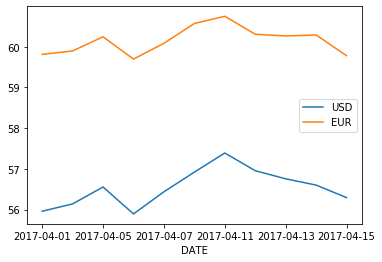

In [29]:
%matplotlib inline


df[['USD', 'EUR']].plot()

#### Сохранение

`DataFrame` можно сохранить в `CSV`-файл, `Excel` и в другие форматы:

> df.to_csv('data/curr.csv')

> df.to_excel('data/curr.xsl')